# XGBoost

## Introduction

XGBoost, short for Extreme Gradient Boosting, is a machine learning algorithm that's used for both classification and regression problems. It's an optimized distributed gradient boosting library that's designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework.

## Key Features

- **Ensemble Method**: XGBoost is an ensemble learning method that creates a strong model from a number of weak ones.
- **Output**: For classification tasks, the output of XGBoost is the class selected by most trees.
- **Adaptive**: XGBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.

## Unique Techniques

XGBoost uses a method known as boosting, which works as follows:

1. We first build a weak model and then build a second model based on the errors from the first model.
2. This process is repeated over and over again until we build a classifier that can make predictions accurately and the error is minimized.
3. Boosting differs from bagging in that it trains the weak learners sequentially and not in parallel.

## Use Cases

XGBoost can be used for both regression and classification problems. Here are a few examples:

- **Predictive Maintenance**: XGBoost can be used to predict the probability of a device failure at a future point in time based on various predictors such as temperature, voltage, rotation speed, etc.

- **Fraud Detection**: XGBoost can be used to identify fraudulent transactions in real-time based on historical transaction patterns.

- **Customer Churn Prediction**: XGBoost can help predict which customers are likely to churn in the future based on their past behavior and interactions.

- **Medical Diagnosis**: XGBoost can be used to predict disease outcomes based on various patient characteristics and test results.

# XGBoost

## Введение

XGBoost, что означает Extreme Gradient Boosting, - это алгоритм машинного обучения, который используется как для задач классификации, так и для задач регрессии. Это оптимизированная распределенная библиотека градиентного усиления, разработанная для высокой эффективности, гибкости и портативности. Он реализует алгоритмы машинного обучения в рамках фреймворка Gradient Boosting.

## Основные особенности

- **Метод ансамбля**: XGBoost - это метод ансамблевого обучения, который создает сильную модель из нескольких слабых.
- **Выход**: Для задач классификации выход XGBoost - это класс, выбранный большинством деревьев.
- **Адаптивность**: XGBoost адаптивен в том смысле, что последующие слабые ученики настраиваются в пользу тех экземпляров, которые были неправильно классифицированы предыдущими классификаторами.

## Уникальные техники

XGBoost использует метод, известный как усиление, который работает следующим образом:

1. Сначала мы строим слабую модель, а затем строим вторую модель на основе ошибок первой модели.
2. Этот процесс повторяется снова и снова, пока мы не построим классификатор, который может точно делать прогнозы, и ошибка минимизируется.
3. Усиление отличается от бэггинга тем, что он обучает слабых учеников последовательно, а не параллельно.

## Примеры использования

XGBoost можно использовать как для задач регрессии, так и для задач классификации. Вот несколько примеров:

- **Прогнозное обслуживание**: XGBoost можно использовать для прогнозирования вероятности отказа устройства в будущем времени на основе различных предикторов, таких как температура, напряжение, скорость вращения и т. д.

- **Обнаружение мошенничества**: XGBoost можно использовать для идентификации мошеннических транзакций в реальном времени на основе исторических шаблонов транзакций.

- **Прогнозирование оттока клиентов**: XGBoost может помочь предсказать, какие клиенты, вероятно, уйдут в будущем, на основе их прошлого поведения и взаимодействия.

- **Медицинская диагностика**: XGBoost можно использовать для прогнозирования исходов болезней на основе различных характеристик пациента и результатов тестов.

Accuracy: 0.8711823274786366


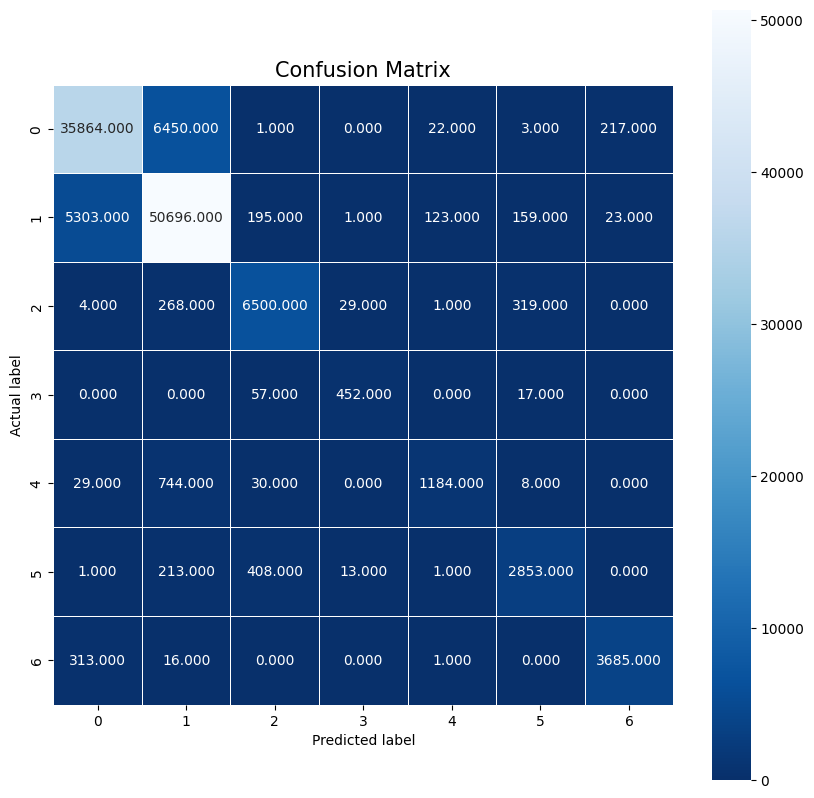

In [3]:
try:
    import xgboost as xgb
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import fetch_covtype
    from sklearn.metrics import accuracy_score, confusion_matrix
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
except ImportError as e:
    !pip install xgboost scikit-learn numpy matplotlib seaborn
    print(f"Error: {e}. Please install the required libraries.")

class XGBoost_Classifier:
    def __init__(self):
        self.clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    def load_data(self):
        covertype = fetch_covtype()
        self.X = covertype.data
        self.y = covertype.target - 1
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def train(self):
        self.clf.fit(self.X_train, self.y_train)

    def predict(self):
        self.predictions = self.clf.predict(self.X_test)

    def accuracy(self):
        return accuracy_score(self.y_test, self.predictions)

    def plot_confusion_matrix(self):
        cm = confusion_matrix(self.y_test, self.predictions)
        plt.figure(figsize=(10,10))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        plt.title('Confusion Matrix', size = 15);
        plt.show()

xgboost_classifier = XGBoost_Classifier()
xgboost_classifier.load_data()
xgboost_classifier.train()
xgboost_classifier.predict()
print("Accuracy:", xgboost_classifier.accuracy())
xgboost_classifier.plot_confusion_matrix()


This code uses the XGBoostClassifier from the xgboost library to create a classifier for the Covertype dataset. It follows the same steps as the previous code: loading the data, training the model, making predictions, calculating the accuracy, and plotting the confusion matrix. The use_label_encoder parameter is set to False to avoid a warning message about the deprecation of the label encoder in XGBoost, and the eval_metric parameter is set to ‘mlogloss’ to specify the evaluation metric to be used.

Этот код использует XGBoostClassifier из библиотеки xgboost для создания классификатора для набора данных Covertype. Он следует тем же шагам, что и предыдущий код: загрузка данных, обучение модели, прогнозирование, расчет точности и построение матрицы ошибок. Параметр use_label_encoder установлен на False, чтобы избежать предупреждающего сообщения о недействительности метки в XGBoost, а параметр eval_metric установлен на ‘mlogloss’, чтобы указать используемую метрику оценки.